# Charting the different "Alpha" indices

The NSE has quite a few "strategy" [indices](https://www.nseindia.com/products/content/equities/indices/strategic_indices.htm) floating about. Here is how you explore then on pluto.

In [1]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(quantmod)
library(PerformanceAnalytics)
library(reshape2)
library(ggrepel)

options(repr.plot.width=16, repr.plot.height=8)

#initialize
indices<-Indices()

In [2]:
#what are the start and end-dates for which total-return (TR) indices are available for 'alpha' incies?

#documentation: https://plutopy.readthedocs.io/en/latest/Indices.html

alphaIndices <- indices$NseTimeSeries() %>%
    filter(NAME %like% '%alpha% TR') %>%
    group_by(NAME) %>%
    summarize(ST = min(TIME_STAMP, na.rm=T), ET = max(TIME_STAMP, na.rm=T)) %>%
    arrange(desc(ST)) %>%
    collect()

alphaIndices %>% print()

# A tibble: 5 x 3
  NAME                                           ST         ET        
* <chr>                                          <chr>      <chr>     
1 NIFTY ALPHA LOW-VOLATILITY 30 TR               2005-04-01 2019-09-12
2 NIFTY ALPHA QUALITY VALUE LOW-VOLATILITY 30 TR 2005-04-01 2019-09-12
3 NIFTY100 ALPHA 30 TR                           2005-04-01 2019-09-12
4 NIFTY ALPHA QUALITY LOW-VOLATILITY 30 TR       2005-04-01 2019-09-12
5 NIFTY ALPHA 50 TR                              2003-12-31 2019-09-12


In [3]:
# it looks like most of them are covered through 2005-04-01

startDate <- as.Date("2005-04-01")

dailies <- NULL
for(index in alphaIndices$NAME){
    pxDt <- indices$NseTimeSeries() %>%
        filter(NAME == index & TIME_STAMP >= startDate) %>%
        select(TIME_STAMP, CLOSE) %>%
        collect() %>%
        mutate(TIME_STAMP = as.Date(TIME_STAMP))
    
    dailies <- merge.xts(dailies, dailyReturn(xts(pxDt$CLOSE, pxDt$TIME_STAMP)))
}

names(dailies) <- alphaIndices$NAME

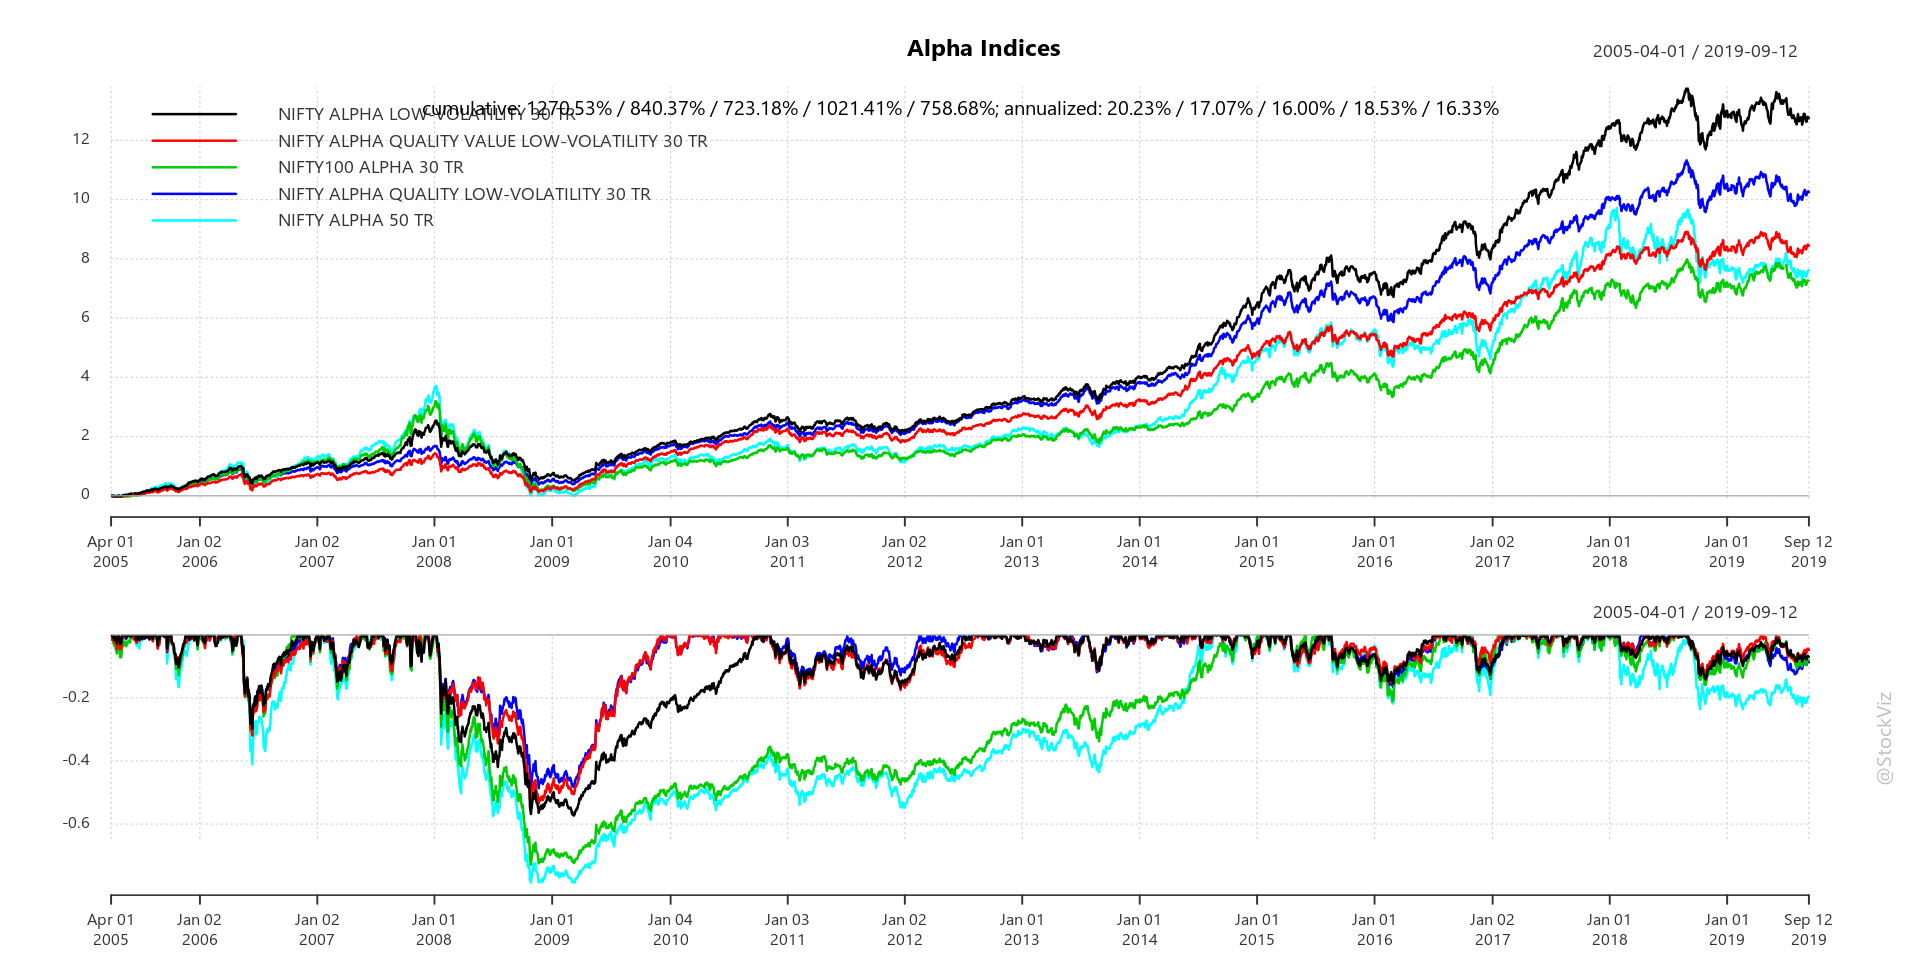

In [4]:
Common.PlotCumReturns(dailies, "Alpha Indices", NA)

### tl;dr

1. If you want a quick recovery from panic drawdowns, go with the one with "quality" attached. 
1. The "best" in terms of performance is the NIFTY ALPHA LOW-VOLATILITY 30 TR [index](https://www.niftyindices.com/indices/equity/strategy-indices/nifty-alpha-low-volatility-30). 
1. Caveat: it also includes stocks from the MIDCAP-50 index.

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)